In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60) # Import dataset LFW People
print(faces.target_names) #Menampilkan nama-nama dalam dataset
print(len(faces.target_names)) # Menampilkan jumlah nama
print(faces.images.shape) # Mencetak shape dari atribut image

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
7
(1277, 62, 47)


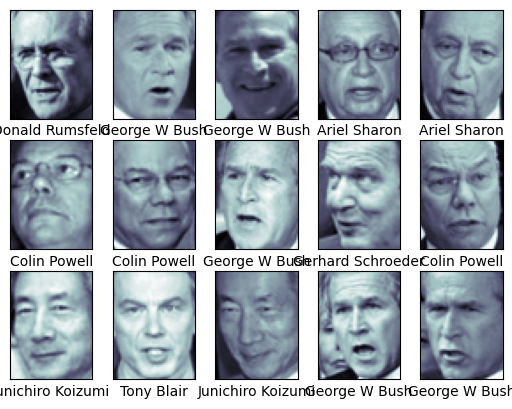

In [7]:
# contoh wajah yang digunakan
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5) # Membuat fig dengan grid subplot 3 baris 5 kolom
for i, axi in enumerate(ax.flat): # Digunakan untuk mendapatkan indeks i dan objek subplot axi
    axi.imshow(faces.images[i], cmap='bone') # Mengambil gambar wajah dan mengatur warna gambar
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]]) # Mengatur properti subplot

In [8]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [9]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 20.8 s
Wall time: 21 s
{'svc__C': 10, 'svc__gamma': 0.005}
0.846340532286213


In [11]:
# Memilih model 
model = grid.best_estimator_
# Melakukan prediksi 
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

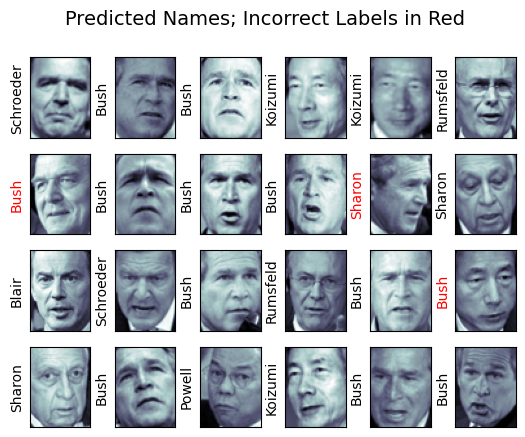

In [12]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[]) # menghilangkan tanda sumbu x dan y 

    # Mengatur label pada sumbu y dengan nama prediksi
    # Warna teks label akan berubah menjadi merah jika prediksi salah
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14) # Menmapilkan judul

In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names)) # Mencetak laporan klasifikasi berdasarkan hasil prediksi

                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.54      0.61        13
     Colin Powell       0.78      0.88      0.83        66
  Donald Rumsfeld       1.00      0.60      0.75        30
    George W Bush       0.82      0.94      0.88       139
Gerhard Schroeder       0.94      0.71      0.81        24
Junichiro Koizumi       1.00      0.82      0.90        17
       Tony Blair       0.93      0.81      0.86        31

         accuracy                           0.84       320
        macro avg       0.88      0.76      0.81       320
     weighted avg       0.86      0.84      0.84       320



Text(113.92222222222219, 0.5, 'predicted label')

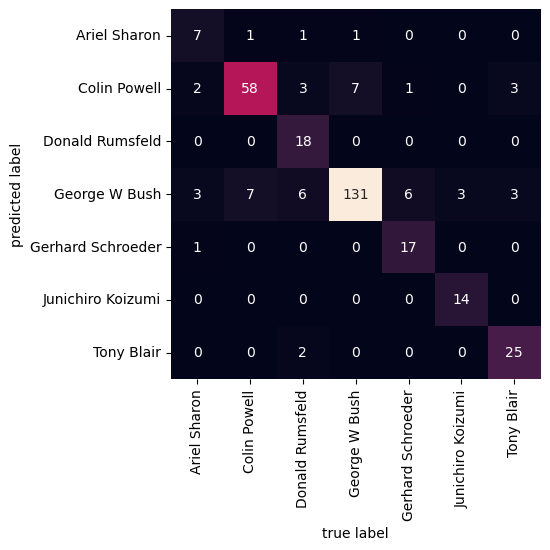

In [15]:
# bentuk confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')